# 04 - Clustering

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.metrics import silhouette_score
import numpy as np

from models.X_RCC import XRCC, XRCC_silhouette
from visualization.custom_plots import standard_format, day_of_year_to_date, standard_format_single, plot_seasons_bk_results

import warnings
warnings.filterwarnings('ignore')

In [2]:
# -- FREE PARAMETERS
n_seasons   = 2
n_iters     = 200

learning_rate   = 10
min_len         = 30
mode            = 'single'
starting_bp     = [165, 264]

In [3]:
# Geopackages with boundaries
country_boundary_file   = '../data/raw/external/GADM41_IND.gpkg' 
world_boundary_file     = '../data/raw/external/GADM41_WORLD.gpkg' 

# Path for results
results_path_file   = f'../data/results/netcdf_files/clustering_results_{n_seasons}seas_{n_iters}iters.nc'
results_path_image  = f'../data/results/images/clustering_results_{n_seasons}seas_{n_iters}iters.png'

# Geodataframes for boudaries - Level 0 is for country boundaries 
country_boundary    = gpd.read_file(country_boundary_file, layer = 'ADM_ADM_0')
world_boundary      = gpd.read_file(world_boundary_file, layer = 'ADM_0')

In [4]:
dataset_t2m = xr.open_mfdataset(rf'/work/users/jgrassi/Radially_constrained_clustering/data/India/ERA5/preprocessed/2m_temperature/temperature_1980_2011_15dd.nc').var167.load()
dataset_tp = xr.open_mfdataset(rf'/work/users/jgrassi/Radially_constrained_clustering/data/India/ERA5/preprocessed/total_precipitation/precipitation_1980_2011_15dd.nc').tp.load()

dataset_tp['time'] = dataset_t2m['time']

In [5]:
datasets = [dataset_tp, dataset_t2m]  # Add as many datasets as needed

clustering_params = {
    'iters': n_iters,
    'n_seas': n_seasons,
    'learning_rate': learning_rate,
    'min_len': min_len,
    'mode': mode,
    'starting_bp': starting_bp,
}

result = XRCC(datasets, **clustering_params)

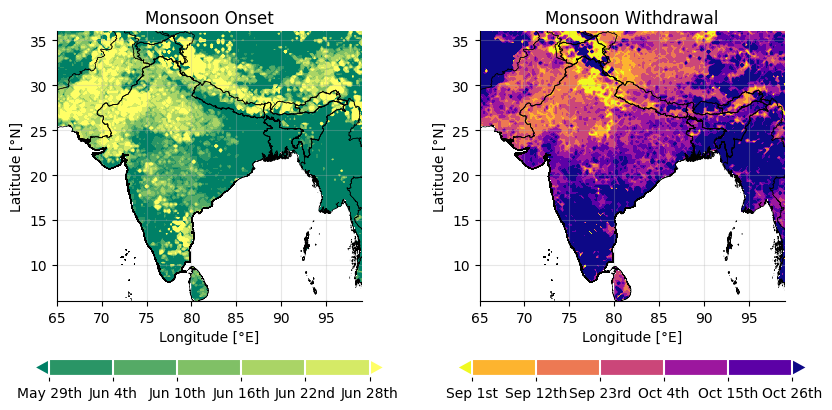

In [ ]:
plot_seasons_bk_results( result, figsize=(10,5), cmaps=['summer', 'plasma_r'],
                         lims=[[150,180],[245,300]], titles=['Monsoon Onset', 'Monsoon Withdrawal'],
                         country_boundary=country_boundary, world_boundary=world_boundary)

plt.savefig(results_path_image, dpi=300, bbox_inches='tight', transparent=False)

In [ ]:
result.attrs=dict(
        Description="Dataset with seasonal onset dates obtained with Radially Constrained Clustering",
        Parameters=(

            f"Number of seasons: {n_seasons}",
            f"Number of iterations: {n_iters}",
            f"Learning rate: {learning_rate}",
            f"Minimum length of seasons: {min_len}",
            f"Clustering mode: {mode}",
            f"Initializtion dates: {[day_of_year_to_date(x) for x in starting_bp]}",
    
        )
    )

result.to_netcdf(results_path_file)

In [ ]:
# datasets = [dataset_tp, dataset_t2m]  # List of xarray DataArrays

# tot = []
# for j, st in zip([2,4], [[165, 264],[80, 165, 264, 300]]):
#     clustering_params = {
#         'iters': 100,
#         'learning_rate': 10,
#         'min_len': 30,
#         'mode': 'single',
#         'starting_bp': st,  # Optional, if starting_bp is used
#         'n_seas' : j
#     }

#     silhouette_scores = XRCC_silhouette(datasets, **clustering_params)
#     tot.append(silhouette_scores.assign_coords(n_seasons=j))

# tota = xr.concat(tot, dim='n_seasons')


In [ ]:
# plot = tota.plot(col='n_seasons', col_wrap=2, vmin=0, vmax=0.25, levels=7, add_colorbar=False, figsize=(7,3))

# standard_format( plot,
#                  country_boundary   = country_boundary,
#                  world_boundary     = world_boundary,
#                  custom_cbar        = True
#                 )

In [ ]:
# combined_data_array_filled = tota.fillna(-np.inf)
# max_n_seasons_idx = combined_data_array_filled.argmax(dim='n_seasons')
# max_n_seasons = tota['n_seasons'][max_n_seasons_idx]

# # Crea un mask per individuare dove entrambi i n_seasons sono NaN
# nan_mask = np.isnan(tota.sel(n_seasons=2)) & np.isnan(tota.sel(n_seasons=4))

# # Rimuovere i NaN dai risultati finali usando il mask
# max_n_seasons = max_n_seasons.where(~nan_mask)

In [ ]:
# plot = max_n_seasons.plot(vmin=1, vmax=5, levels=3, add_colorbar=False, figsize=(5,5))

# standard_format_single( plot,
#                         country_boundary   = country_boundary,
#                         # world_boundary     = world_boundary,
#                         custom_cbar        = True
#                         )
# plot.colorbar.set_ticks(ticks=[2,4], labels=[2,4])